In [1]:
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,cohen_kappa_score

In [2]:
data = pd.read_csv("C:\\Users\manideep\Downloads\\data.csv")

In [3]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data=data.replace({'diagnosis':'M'},0)
data=data.replace({'diagnosis':'B'},1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# %% normalization
#data = (data -np.min(data))/(np.max(data)-np.min(data)).values

In [5]:
y = data.diagnosis.values

In [6]:
x = data.drop(['diagnosis'], axis=1)

In [7]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7)

In [18]:
#pca_1 = PCA(n_components=1)
#pca_2 = PCA(n_components=10)
pca_3 = PCA(n_components=15)
#principalComponents = pca_1.fit_transform(x)
#principalComponents = pca_2.fit_transform(x)
principalComponents = pca_3.fit_transform(x) 
#principalComponents
#print(np.sum(pca_1.explained_variance_ratio_))
#print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

#pca = PCA(n_components=29)
#principalComponents = pca.fit_transform(x)
#print(np.sum(pca.explained_variance_ratio_))

0.9999999959371423


In [50]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, x, y, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 91.03%


In [51]:

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)
dt_grid_search.fit(x, y)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(x, y)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Optimal Parameters: {}".format(dt_grid_search.best_params_))

Mean Training Score: 97.16%
Mean Testing Score: 98.07%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}


C:\Users\manideep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, x, y, cv=5))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

Mean Cross Validation Score for Random Forest Classifier: 95.09%


In [53]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 6, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2, 5]}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5)
rf_grid_search.fit(x, y)
rf_grid_testing_score = rf_grid_search.score(x, y)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Mean Testing Score: {:.4}%".format(rf_grid_testing_score * 100))
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 96.66%
Mean Testing Score: 99.3%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}


C:\Users\manideep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, x, y, cv=5))

print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 97.02%


In [55]:

adaboost_param_grid = {'n_estimators': [50, 100, 250], 'learning_rate': [1.0, 0.5, 0.1]}

adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=5)
adaboost_grid_search.fit(x, y)
adaboost_grid_testing_score = adaboost_grid_search.score(x, y)

print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("Mean Testing Score: {:.4}%".format(adaboost_grid_testing_score * 100))
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 97.54%
Mean Testing Score: 100.0%
Optimal Parameters: {'learning_rate': 1.0, 'n_estimators': 250}


In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [57]:
lda=LinearDiscriminantAnalysis()

In [58]:
estimators = list(range(1, 200, 3))
abc_scores = []
for n_est in estimators:
    clf = AdaBoostClassifier(n_estimators=6, learning_rate= 1.0,base_estimator=rf_clf)
    clf.fit(X_train, y_train)
    training_preds = clf.predict(X_train)
    val_preds = clf.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    print("Validation accuracy: {:.4}%".format(val_accuracy * 100)) 
    acc = accuracy_score(y_test, val_preds)
    pre=precision_score(y_test, val_preds)
    f1=f1_score(y_test, val_preds)
    recall=recall_score(y_test, val_preds)
    print("Validation pre: {:.4}%".format(pre * 100)) 
    print("Validation f1: {:.4}%".format(f1 * 100)) 
    print("Validation recall: {:.4}%".format(recall* 100)) 



#print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Validation accuracy: 96.49%
Validation pre: 95.28%
Validation f1: 97.12%
Validation recall: 99.02%
Validation accuracy: 97.66%
Validation pre: 96.23%
Validation f1: 98.08%
Validation recall: 100.0%
Validation accuracy: 96.49%
Validation pre: 95.28%
Validation f1: 97.12%
Validation recall: 99.02%
Validation accuracy: 95.32%
Validation pre: 96.08%
Validation f1: 96.08%
Validation recall: 96.08%
Validation accuracy: 95.91%
Validation pre: 96.12%
Validation f1: 96.59%
Validation recall: 97.06%
Validation accuracy: 97.08%
Validation pre: 95.33%
Validation f1: 97.61%
Validation recall: 100.0%
Validation accuracy: 97.66%
Validation pre: 96.23%
Validation f1: 98.08%
Validation recall: 100.0%
Validation accuracy: 96.49%
Validation pre: 95.28%
Validation f1: 97.12%
Validation recall: 99.02%
Validation accuracy: 96.49%
Validation pre: 96.15%
Validation f1: 97.09%
Validation recall: 98.04%
Validation accuracy: 97.66%
Validation pre: 97.12%
Validation f1: 98.06%
Validation recall: 99.02%
Validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from scipy import interp
cv = StratifiedKFold(n_splits=4,shuffle=False)

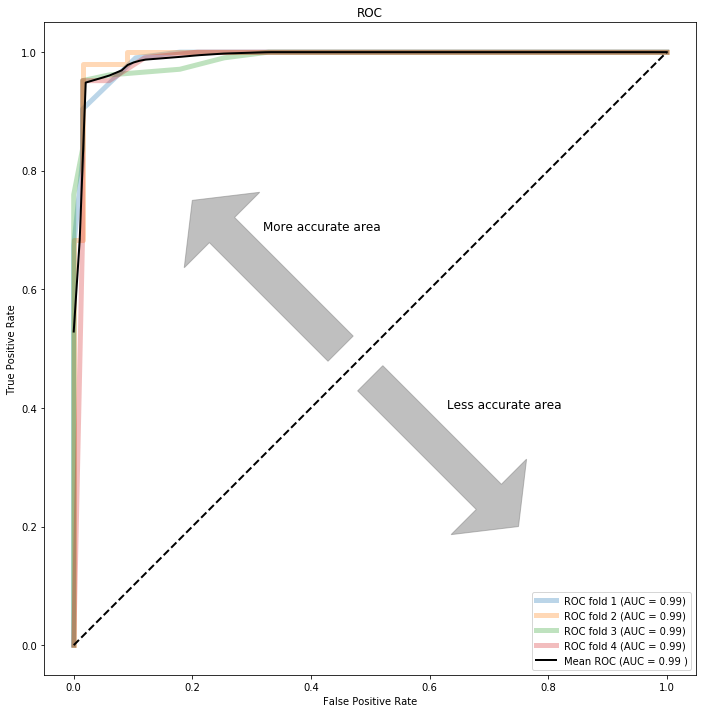

In [18]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='gray',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='gray',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(X_train,y_train).predict_proba(X_test)
    prediction
    fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()